In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import precision_recall_fscore_support
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Dense, Activation,Dropout

In [2]:
df_data=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
#df_data['NObeyesdad'].value_counts()

In [4]:
# df_x
df_data.loc()[df_data['family_history_with_overweight']=='no','family_history_with_overweight']=0
df_data.loc()[df_data['family_history_with_overweight']=='yes','family_history_with_overweight']=1

df_data.loc()[df_data['FAVC']=='no','FAVC']=0
df_data.loc()[df_data['FAVC']=='yes','FAVC']=1

df_data.loc()[df_data['SMOKE']=='no','SMOKE']=0
df_data.loc()[df_data['SMOKE']=='yes','SMOKE']=1

df_data.loc()[df_data['SCC']=='no','SCC']=0
df_data.loc()[df_data['SCC']=='yes','SCC']=1

df_data.loc()[df_data['CAEC']=='No','CAEC']=1
df_data.loc()[df_data['CAEC']=='no','CAEC']=1
df_data.loc()[df_data['CAEC']=='Sometimes','CAEC']=2
df_data.loc()[df_data['CAEC']=='Frequently','CAEC']=3
df_data.loc()[df_data['CAEC']=='Always','CAEC']=4

df_data.loc()[df_data['CALC']=='no','CALC']=1
df_data.loc()[df_data['CALC']=='Sometimes','CALC']=2
df_data.loc()[df_data['CALC']=='Frequently','CALC']=3
df_data.loc()[df_data['CALC']=='Always','CALC']=4

df_data.loc()[df_data['Gender']=='Female','Gender']=0
df_data.loc()[df_data['Gender']=='Male','Gender']=1
df_data
df_data.loc()[df_data['MTRANS']=='Public_Transportation','MTRANS']=0
df_data.loc()[df_data['MTRANS']=='Walking','MTRANS']=1

df_data.loc()[df_data['NObeyesdad']=='Normal_Weight','NObeyesdad']=0
df_data.loc()[df_data['NObeyesdad']=='Obesity_Type_I','NObeyesdad']=1
df_data.loc()[df_data['NObeyesdad']=='Obesity_Type_II','NObeyesdad']=2

df_data.loc()[df_data['NObeyesdad']=='Obesity_Type_III','NObeyesdad']=3

df_data.loc()[df_data['NObeyesdad']=='Overweight_Level_I','NObeyesdad']=4
df_data.loc()[df_data['NObeyesdad']=='Overweight_Level_II','NObeyesdad']=5
df_data.loc()[df_data['NObeyesdad']=='Insufficient_Weight','NObeyesdad']=6







In [5]:
df_data[['family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC','CALC']]=df_data[
    ['family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC','CALC']
].astype(int)


In [6]:
df_x=df_data.drop(['NObeyesdad'],axis=1)
df_y=df_data.loc[:,'NObeyesdad']

x = pd.get_dummies(df_x)
y = pd.get_dummies(df_y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [7]:
#資料前處理

In [8]:
input_layer = Input(shape=(x_train.shape[1],))
dense_layer_1 =Dense(32,kernel_initializer=tf.keras.initializers.GlorotNormal() ,activation='relu', name ="nl1" )(input_layer)
dense_layer_2 = Dense(16,kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu', name ="nl2" )(dense_layer_1)
dense_layer_2 = Dense(10,activation='relu', name ="nl3" )(dense_layer_2)
dense_layer_2 = Dense(10,activation='relu', name ="nl4" )(dense_layer_2)
dense_layer_2 = Dropout(0.5)(dense_layer_2)
output = Dense(y_train.shape[1],activation='softmax')(dense_layer_2)
model = Model(inputs=input_layer, outputs=output)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
nl1 (Dense)                  (None, 32)                704       
_________________________________________________________________
nl2 (Dense)                  (None, 16)                528       
_________________________________________________________________
nl3 (Dense)                  (None, 10)                170       
_________________________________________________________________
nl4 (Dense)                  (None, 10)                110       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 7)                 77    

In [9]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',mode='min', patience=5)
Adam = tf.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.997, epsilon=1e-08, decay=0.0)
model.compile(optimizer=Adam, 
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics = [tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
              )
history = model.fit(x=x_train, y=y_train,  epochs=50,batch_size =5, callbacks=[callback] )

Epoch 1/50
338/338 [==============================] - 1s 519us/step - loss: 2.0994 - precision: 0.2167 - recall: 0.0167
Epoch 2/50
338/338 [==============================] - ETA: 0s - loss: 1.6478 - precision: 0.7261 - recall: 0.0903   - 0s 550us/step - loss: 1.6377 - precision: 0.7169 - recall: 0.0928
Epoch 3/50
338/338 [==============================] - 0s 533us/step - loss: 1.4692 - precision: 0.5977 - recall: 0.1247
Epoch 4/50
338/338 [==============================] - 0s 509us/step - loss: 1.4135 - precision: 0.6574 - recall: 0.1440
Epoch 5/50
338/338 [==============================] - 0s 515us/step - loss: 1.3510 - precision: 0.6508 - recall: 0.1497
Epoch 6/50
338/338 [==============================] - 0s 497us/step - loss: 1.2488 - precision: 0.7553 - recall: 0.1751
Epoch 7/50
338/338 [==============================] - 0s 500us/step - loss: 1.2356 - precision: 0.7123 - recall: 0.1716
Epoch 8/50
338/338 [==============================] - 0s 499us/step - loss: 1.1315 - precision: 

In [10]:
callback = tf.keras.callbacks.EarlyStopping(monitor='acc',mode='max', patience=5)
Adam = tf.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.997, epsilon=1e-08, decay=0.0)
model.compile(optimizer=Adam, 
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics = [tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.Accuracy()]
              )
history = model.fit(x=x_train, y=y_train,  epochs=50,batch_size =5, callbacks=[callback] )

Epoch 1/50
338/338 [==============================] - 1s 527us/step - loss: 0.8889 - precision_1: 0.8053 - recall_1: 0.4083 - accuracy: 0.1137
Epoch 2/50
338/338 [==============================] - 0s 528us/step - loss: 1.0399 - precision_1: 0.7538 - recall_1: 0.3546 - accuracy: 0.1120
Epoch 3/50
338/338 [==============================] - 0s 559us/step - loss: 0.9020 - precision_1: 0.8169 - recall_1: 0.3985 - accuracy: 0.1197
Epoch 4/50
338/338 [==============================] - 0s 523us/step - loss: 0.9315 - precision_1: 0.7833 - recall_1: 0.4110 - accuracy: 0.1212
Epoch 5/50
338/338 [==============================] - 0s 536us/step - loss: 1.0515 - precision_1: 0.6958 - recall_1: 0.2818 - accuracy: 0.0647   
Epoch 6/50
338/338 [==============================] - 0s 527us/step - loss: 0.9029 - precision_1: 0.8234 - recall_1: 0.4714 - accuracy: 0.1343
Epoch 7/50
338/338 [==============================] - 0s 527us/step - loss: 1.1040 - precision_1: 0.6730 - recall_1: 0.3190 - accuracy: 0.0

338/338 [==============================] - 0s 533us/step - loss: 0.9834 - precision_1: 0.6899 - recall_1: 0.3841 - accuracy: 0.1124
Epoch 30/50
338/338 [==============================] - 0s 539us/step - loss: 0.8852 - precision_1: 0.7833 - recall_1: 0.4384 - accuracy: 0.1746
Epoch 31/50
338/338 [==============================] - 0s 530us/step - loss: 0.9567 - precision_1: 0.7867 - recall_1: 0.4290 - accuracy: 0.1539
Epoch 32/50
338/338 [==============================] - 0s 533us/step - loss: 0.9010 - precision_1: 0.7973 - recall_1: 0.4718 - accuracy: 0.1678
Epoch 33/50
338/338 [==============================] - 0s 539us/step - loss: 0.8861 - precision_1: 0.7952 - recall_1: 0.4885 - accuracy: 0.1749
Epoch 34/50
338/338 [==============================] - 0s 619us/step - loss: 0.8334 - precision_1: 0.8332 - recall_1: 0.4950 - accuracy: 0.1917
Epoch 35/50
338/338 [==============================] - 0s 534us/step - loss: 0.8773 - precision_1: 0.7606 - recall_1: 0.4453 - accuracy: 0.1539
Epoc

In [11]:
preds = model.evaluate(x = x_test, y = y_test)

F1 = 2 * (preds[1] * preds[2]) / (preds[1] + preds[2])
print(preds)
print(F1)

14/14 [==============================] - 0s 614us/step - loss: 0.7021 - precision_1: 0.7604 - recall_1: 0.5626 - accuracy: 0.2435
[0.7020601034164429, 0.7603833675384521, 0.5626477599143982, 0.2434988170862198]
0.6467391273633105


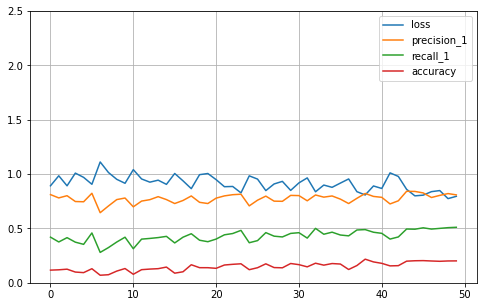

In [12]:

pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
plt.show()

In [13]:
df_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,1,0,0
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,0,0
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,3,0,0
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,3,1,4
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,0,3
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,0,3
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,0,3
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,0,3


# value

In [14]:
df_x=df_data.drop(['Height'],axis=1)
df_y=df_data.loc[:,'Height']

In [15]:
input_layer = Input(shape=(x_train.shape[1],))
dense_layer_1 =Dense(32,kernel_initializer=tf.keras.initializers.GlorotNormal() ,activation='relu', name ="nl1" )(input_layer)
dense_layer_2 = Dense(16,kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu', name ="nl2" )(dense_layer_1)
dense_layer_2 = Dense(10,activation='relu', name ="nl3" )(dense_layer_2)
dense_layer_2 = Dense(10,activation='relu', name ="nl4" )(dense_layer_2)
dense_layer_2 = Dropout(0.5)(dense_layer_2)
output = Dense(y_train.shape[1],activation='softmax')(dense_layer_2)
model = Model(inputs=input_layer, outputs=output)
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
nl1 (Dense)                  (None, 32)                704       
_________________________________________________________________
nl2 (Dense)                  (None, 16)                528       
_________________________________________________________________
nl3 (Dense)                  (None, 10)                170       
_________________________________________________________________
nl4 (Dense)                  (None, 10)                110       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 77  

In [16]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',mode='min', patience=5)
Adam = tf.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.997, epsilon=1e-08, decay=0.0)
model.compile(optimizer=Adam, 
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics = [tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
              )
history = model.fit(x=x_train, y=y_train,  epochs=50,batch_size =5, callbacks=[callback] )

Epoch 1/50
338/338 [==============================] - 1s 530us/step - loss: 2.1130 - precision_2: 0.0934 - recall_2: 0.0078
Epoch 2/50
338/338 [==============================] - 0s 574us/step - loss: 1.7578 - precision_2: 0.6419 - recall_2: 0.0240
Epoch 3/50
338/338 [==============================] - 0s 507us/step - loss: 1.5268 - precision_2: 0.6809 - recall_2: 0.1114
Epoch 4/50
338/338 [==============================] - 0s 509us/step - loss: 1.3723 - precision_2: 0.6612 - recall_2: 0.1357
Epoch 5/50
338/338 [==============================] - 0s 506us/step - loss: 1.2398 - precision_2: 0.6159 - recall_2: 0.1790
Epoch 6/50
338/338 [==============================] - 0s 509us/step - loss: 1.1369 - precision_2: 0.6870 - recall_2: 0.2412
Epoch 7/50
338/338 [==============================] - 0s 500us/step - loss: 1.0918 - precision_2: 0.7070 - recall_2: 0.2802
Epoch 8/50
338/338 [==============================] - 0s 542us/step - loss: 1.0625 - precision_2: 0.6888 - recall_2: 0.2625
Epoch 9/

In [17]:
callback = tf.keras.callbacks.EarlyStopping(monitor='acc',mode='max', patience=5)
Adam = tf.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.997, epsilon=1e-08, decay=0.0)
model.compile(optimizer=Adam, 
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics = [tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.Accuracy()]
              )
history = model.fit(x=x_train, y=y_train,  epochs=50,batch_size =5, callbacks=[callback] )

Epoch 1/50
338/338 [==============================] - 1s 524us/step - loss: 0.8306 - precision_3: 0.7868 - recall_3: 0.5318 - accuracy: 0.1465
Epoch 2/50
338/338 [==============================] - 0s 518us/step - loss: 0.7582 - precision_3: 0.8078 - recall_3: 0.5490 - accuracy: 0.1628
Epoch 3/50
338/338 [==============================] - 0s 543us/step - loss: 0.7503 - precision_3: 0.8238 - recall_3: 0.5929 - accuracy: 0.1649
Epoch 4/50
338/338 [==============================] - 0s 595us/step - loss: 0.9778 - precision_3: 0.6902 - recall_3: 0.4045 - accuracy: 0.1498
Epoch 5/50
338/338 [==============================] - 0s 543us/step - loss: 0.7789 - precision_3: 0.8133 - recall_3: 0.5212 - accuracy: 0.1490
Epoch 6/50
338/338 [==============================] - 0s 581us/step - loss: 0.7918 - precision_3: 0.7988 - recall_3: 0.5431 - accuracy: 0.1596
Epoch 7/50
338/338 [==============================] - 0s 515us/step - loss: 0.7844 - precision_3: 0.8278 - recall_3: 0.5463 - accuracy: 0.1545

Epoch 30/50
338/338 [==============================] - 0s 530us/step - loss: 0.6995 - precision_3: 0.8106 - recall_3: 0.5799 - accuracy: 0.1729
Epoch 31/50
338/338 [==============================] - 0s 540us/step - loss: 0.7286 - precision_3: 0.7865 - recall_3: 0.5599 - accuracy: 0.1720
Epoch 32/50
338/338 [==============================] - 0s 527us/step - loss: 0.7594 - precision_3: 0.8358 - recall_3: 0.5665 - accuracy: 0.1766
Epoch 33/50
338/338 [==============================] - 0s 530us/step - loss: 0.7425 - precision_3: 0.8191 - recall_3: 0.5614 - accuracy: 0.1675
Epoch 34/50
338/338 [==============================] - 0s 542us/step - loss: 0.7328 - precision_3: 0.8106 - recall_3: 0.5665 - accuracy: 0.1636
Epoch 35/50
338/338 [==============================] - 0s 553us/step - loss: 0.7455 - precision_3: 0.7820 - recall_3: 0.5774 - accuracy: 0.1796
Epoch 36/50
338/338 [==============================] - 0s 539us/step - loss: 0.7147 - precision_3: 0.7657 - recall_3: 0.5780 - accuracy:

In [18]:

preds = model.evaluate(x = x_test, y = y_test)

F1 = 2 * (preds[1] * preds[2]) / (preds[1] + preds[2])
print(preds)
print(F1)

14/14 [==============================] - 0s 614us/step - loss: 0.6122 - precision_3: 0.8469 - recall_3: 0.6147 - accuracy: 0.1773
[0.6122452616691589, 0.846905529499054, 0.6146572232246399, 0.1773049682378769]
0.7123287729184383


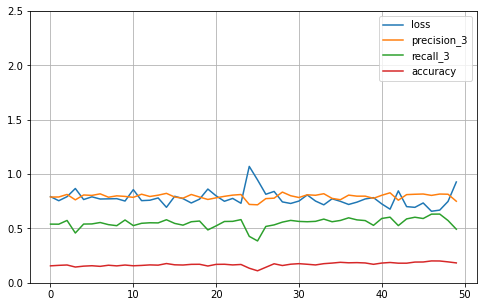

In [19]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
plt.show()